<a href="https://colab.research.google.com/github/jgomezpe/sgoal/blob/main/demo/python/WCCI2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GABO: Gene Analysis Base Optimization
This notebook contains the python code used for getting the results reported by J. Gomez and E. Leon in "GABO: Gene Analysis Base Optimization" 2022 IEEE Congress on Evolutionary Computation (CEC), Padua, Italy, 2022, pp. 1-8, doi: 10.1109/CEC55065.2022.9870237 (https://dl.acm.org/doi/10.1109/CEC55065.2022.9870237).


## Preliminars
To run scripts in this notebook, you must install sgoal package from the github repository by running the following cell:

In [1]:
!pip install git+https://github.com/jgomezpe/sgoal/

  Cloning https://github.com/jgomezpe/sgoal/ to /tmp/pip-req-build-oyxp4av7
  Running command git clone --filter=blob:none --quiet https://github.com/jgomezpe/sgoal/ /tmp/pip-req-build-oyxp4av7
  Resolved https://github.com/jgomezpe/sgoal/ to commit 70e3627117bc84145790fc7958684119ab863fd2
  Preparing metadata (setup.py) ... done
  Created wheel for sgoal: filename=sgoal-1.0.0-py3-none-any.whl size=28394 sha256=51c1ed4d1ca78002d79e316e3ac581392381d3e86e2dc4eeba68983870758d7a
  Stored in directory: /tmp/pip-ephem-wheel-cache-n_99rr_j/wheels/09/42/f7/bd35d370e04658336a29af0773f97f7eb9820491a4920daf43
Successfully built sgoal


##Experiments
We can run $R$ times some SGoals on testbed bit array functions.

================= 120 =================
*************** Mixed ***************
SGOAL   SR      MAX       EVALS
GABO 0.2 273.2+/-5.7 11349.53+/-1952.14
RMHC 0.0 263.5+/-6.15 12000.0+/-0.0
GS1 0.0 210.23+/-2.42 12000.0+/-0.0
GSC1 0.0 209.07+/-2.96 12000.0+/-0.0
GGA 0.0 251.53+/-8.99 12000.0+/-0.0
SSGA 0.0 234.97+/-7.72 12000.0+/-0.0
CHAVELA 0.37 275.8+/-9.18 10828.27+/-1723.03


<Axes: >

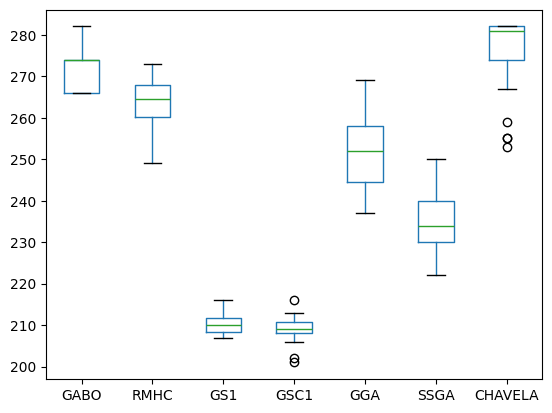

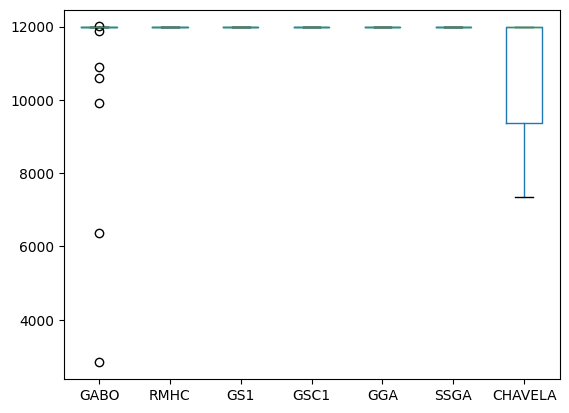

In [2]:
import sgoal
from sgoal.binary import BitArrayProblem
from sgoal.chavela import BitArrayCHAVELA
from sgoal.ga import BitArrayGGA
from sgoal.ga import BitArraySSGA
from sgoal.ggsc1 import GS1
from sgoal.ggsc1 import GSC1
from sgoal.hc import RMHC
from sgoal.gabo import GABO
from sgoal.core import experiment

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# We format numbers to two decimal positions for presentation purposes
def round(x): return (int(100*x+0.5))/100

# We compute statistical information (average and standard deviation)
def stats(a):
  n = len(a)
  avg = sum(a)/n
  std = 0
  for y in a:
    std += (y-avg)**2
  std = (std/(n-1))**0.5
  return avg, std

# Paper reported values
def report(sgoal, fx, evals, sr):
  avg, std = stats(fx)
  avg, std = round(avg), round(std)
  avg_evals, std_evals = stats(evals)
  avg_evals, std_evals = round(avg_evals), round(std_evals)
  print(sgoal, ' ', round(sr), ' ', avg, '+/-', std, ' ', avg_evals, '+/-', std_evals, sep='')
  return sr, avg, std, avg_evals, std_evals

#Main program
# Search algorithm
sgoal = [GABO, RMHC, GS1, GSC1, BitArrayGGA, BitArraySSGA, BitArrayCHAVELA]
sgoal_name = ['GABO', 'RMHC', 'GS1', 'GSC1', 'GGA', 'SSGA', 'CHAVELA']
name = ['MaxOnes','GD3','GBD4','RR1','Mixed']
F = 4 # Testing the Mixed function. Change the number accordingly
R = 30 # Number of experiments
D = 120 # Problem dimension (BitArray Length)
EVALS = 100*D # Maximum number of fitness evaluations

problem = BitArrayProblem(name[F], D)

df = pd.DataFrame()
dfiter = pd.DataFrame()
print('=================', D, '=================')
print('***************', name[F], '***************')
print('SGOAL   SR      MAX       EVALS')
for i in range(len(sgoal)):
  f, evals, sr = experiment(sgoal[i], problem, EVALS, R)
  report(sgoal_name[i], f, evals, sr)
  df[sgoal_name[i]] = f
  dfiter[sgoal_name[i]] = evals

myFig = plt.figure();
df.boxplot(grid=False)
myFig = plt.figure();
dfiter.boxplot(grid=False)